# Training log

Segmentation performance on the validation set through training

In [10]:
library(tidyverse)

In [11]:
theme_set(theme_light())

In [21]:
data <- read_csv("../model/dice_50_50.clean.csv") %>% mutate(epoch = row_number())

Rows: 100 Columns: 8

── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): epoch, train_loss, valid_loss, acc_seg, diceComb, diceLV, diceMY
time (1): time


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [25]:
data %>% filter(epoch%%10==0)

epoch,train_loss,valid_loss,acc_seg,diceComb,diceLV,diceMY,time
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>
10,2.644718,2.906139,0.9960051,0.8630943,0.8526044,0.7850568,00:15:00
20,2.727280,3.071991,0.9960809,0.8421753,0.8444529,0.7680243,00:15:00
30,2.326001,2.822929,0.9962341,0.8800992,0.8398187,0.8082111,00:15:00
40,2.429334,2.809577,0.9962165,0.8835959,0.8372649,0.8078484,00:15:00
50,2.354466,3.262739,0.9961568,0.8371925,0.8272275,0.7610667,00:15:00
60,2.163228,2.915974,0.9963681,0.8768077,0.8326659,0.8034896,00:16:00
70,2.169236,2.995036,0.9962743,0.8728766,0.8221542,0.7996222,00:16:00
80,2.126696,2.643309,0.9965739,0.8919407,0.8513890,0.8191171,00:16:00
90,2.050998,2.844625,0.9964641,0.8742007,0.8383539,0.8022484,00:16:00


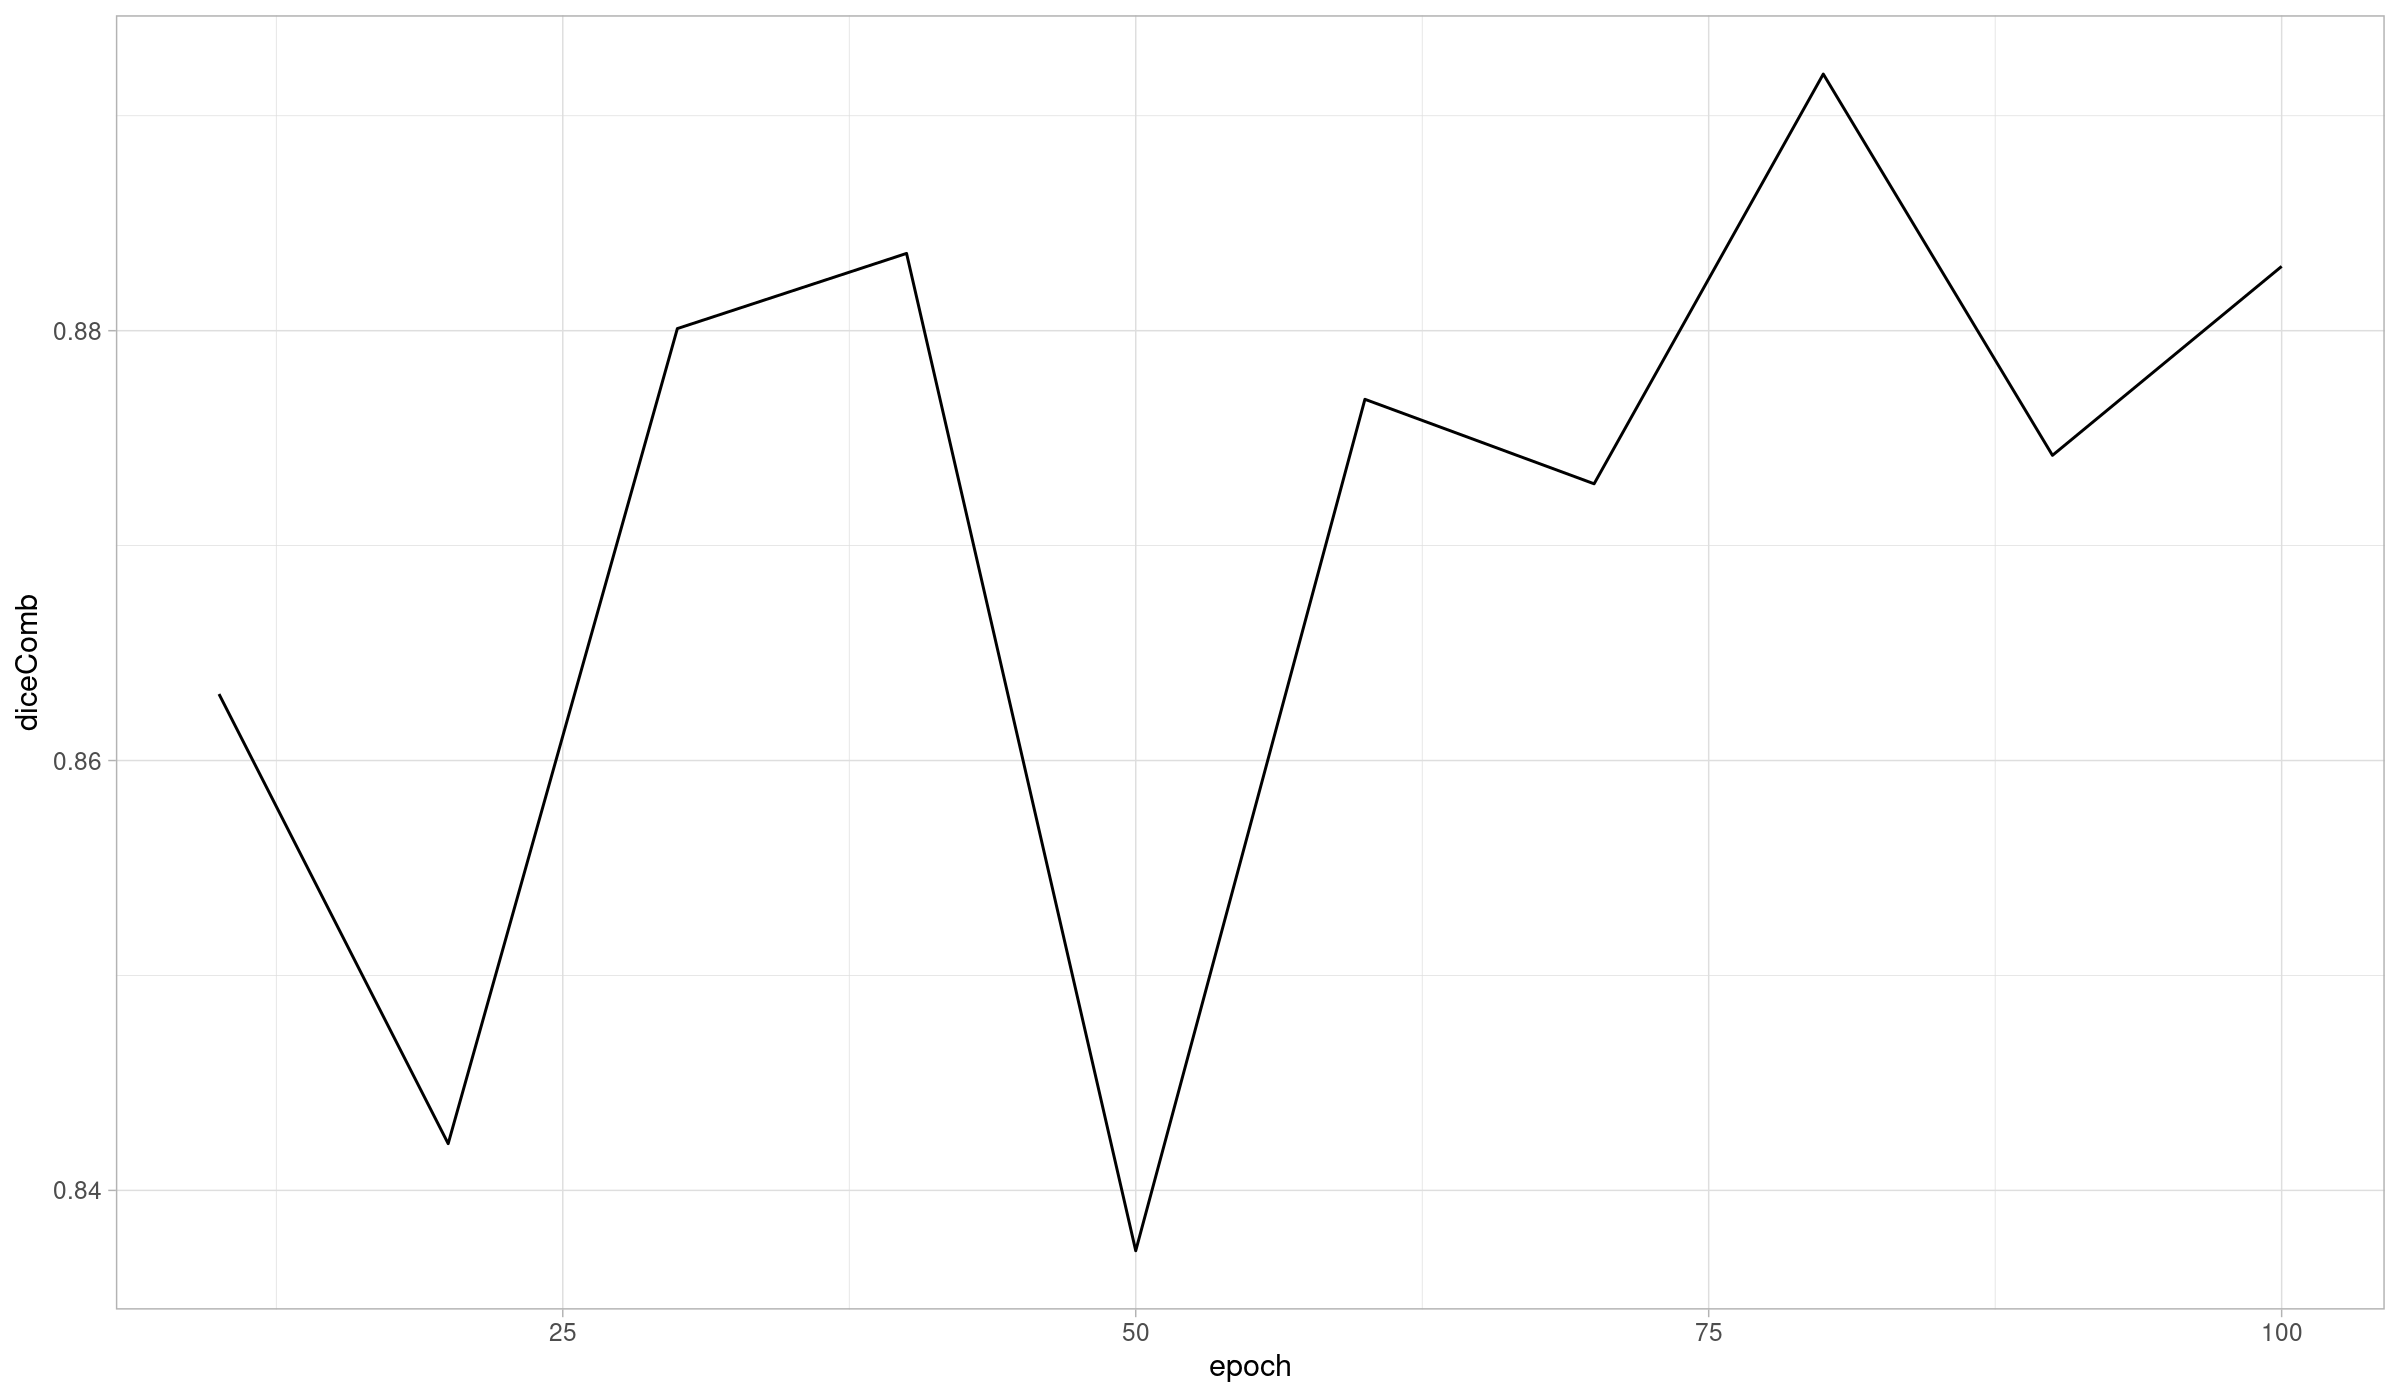

In [24]:
data %>% filter(epoch%%10==0) %>% ggplot(aes(x=epoch, y=diceComb)) + geom_line()

In [15]:
options(repr.plot.res = 200, repr.plot.width = 12)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



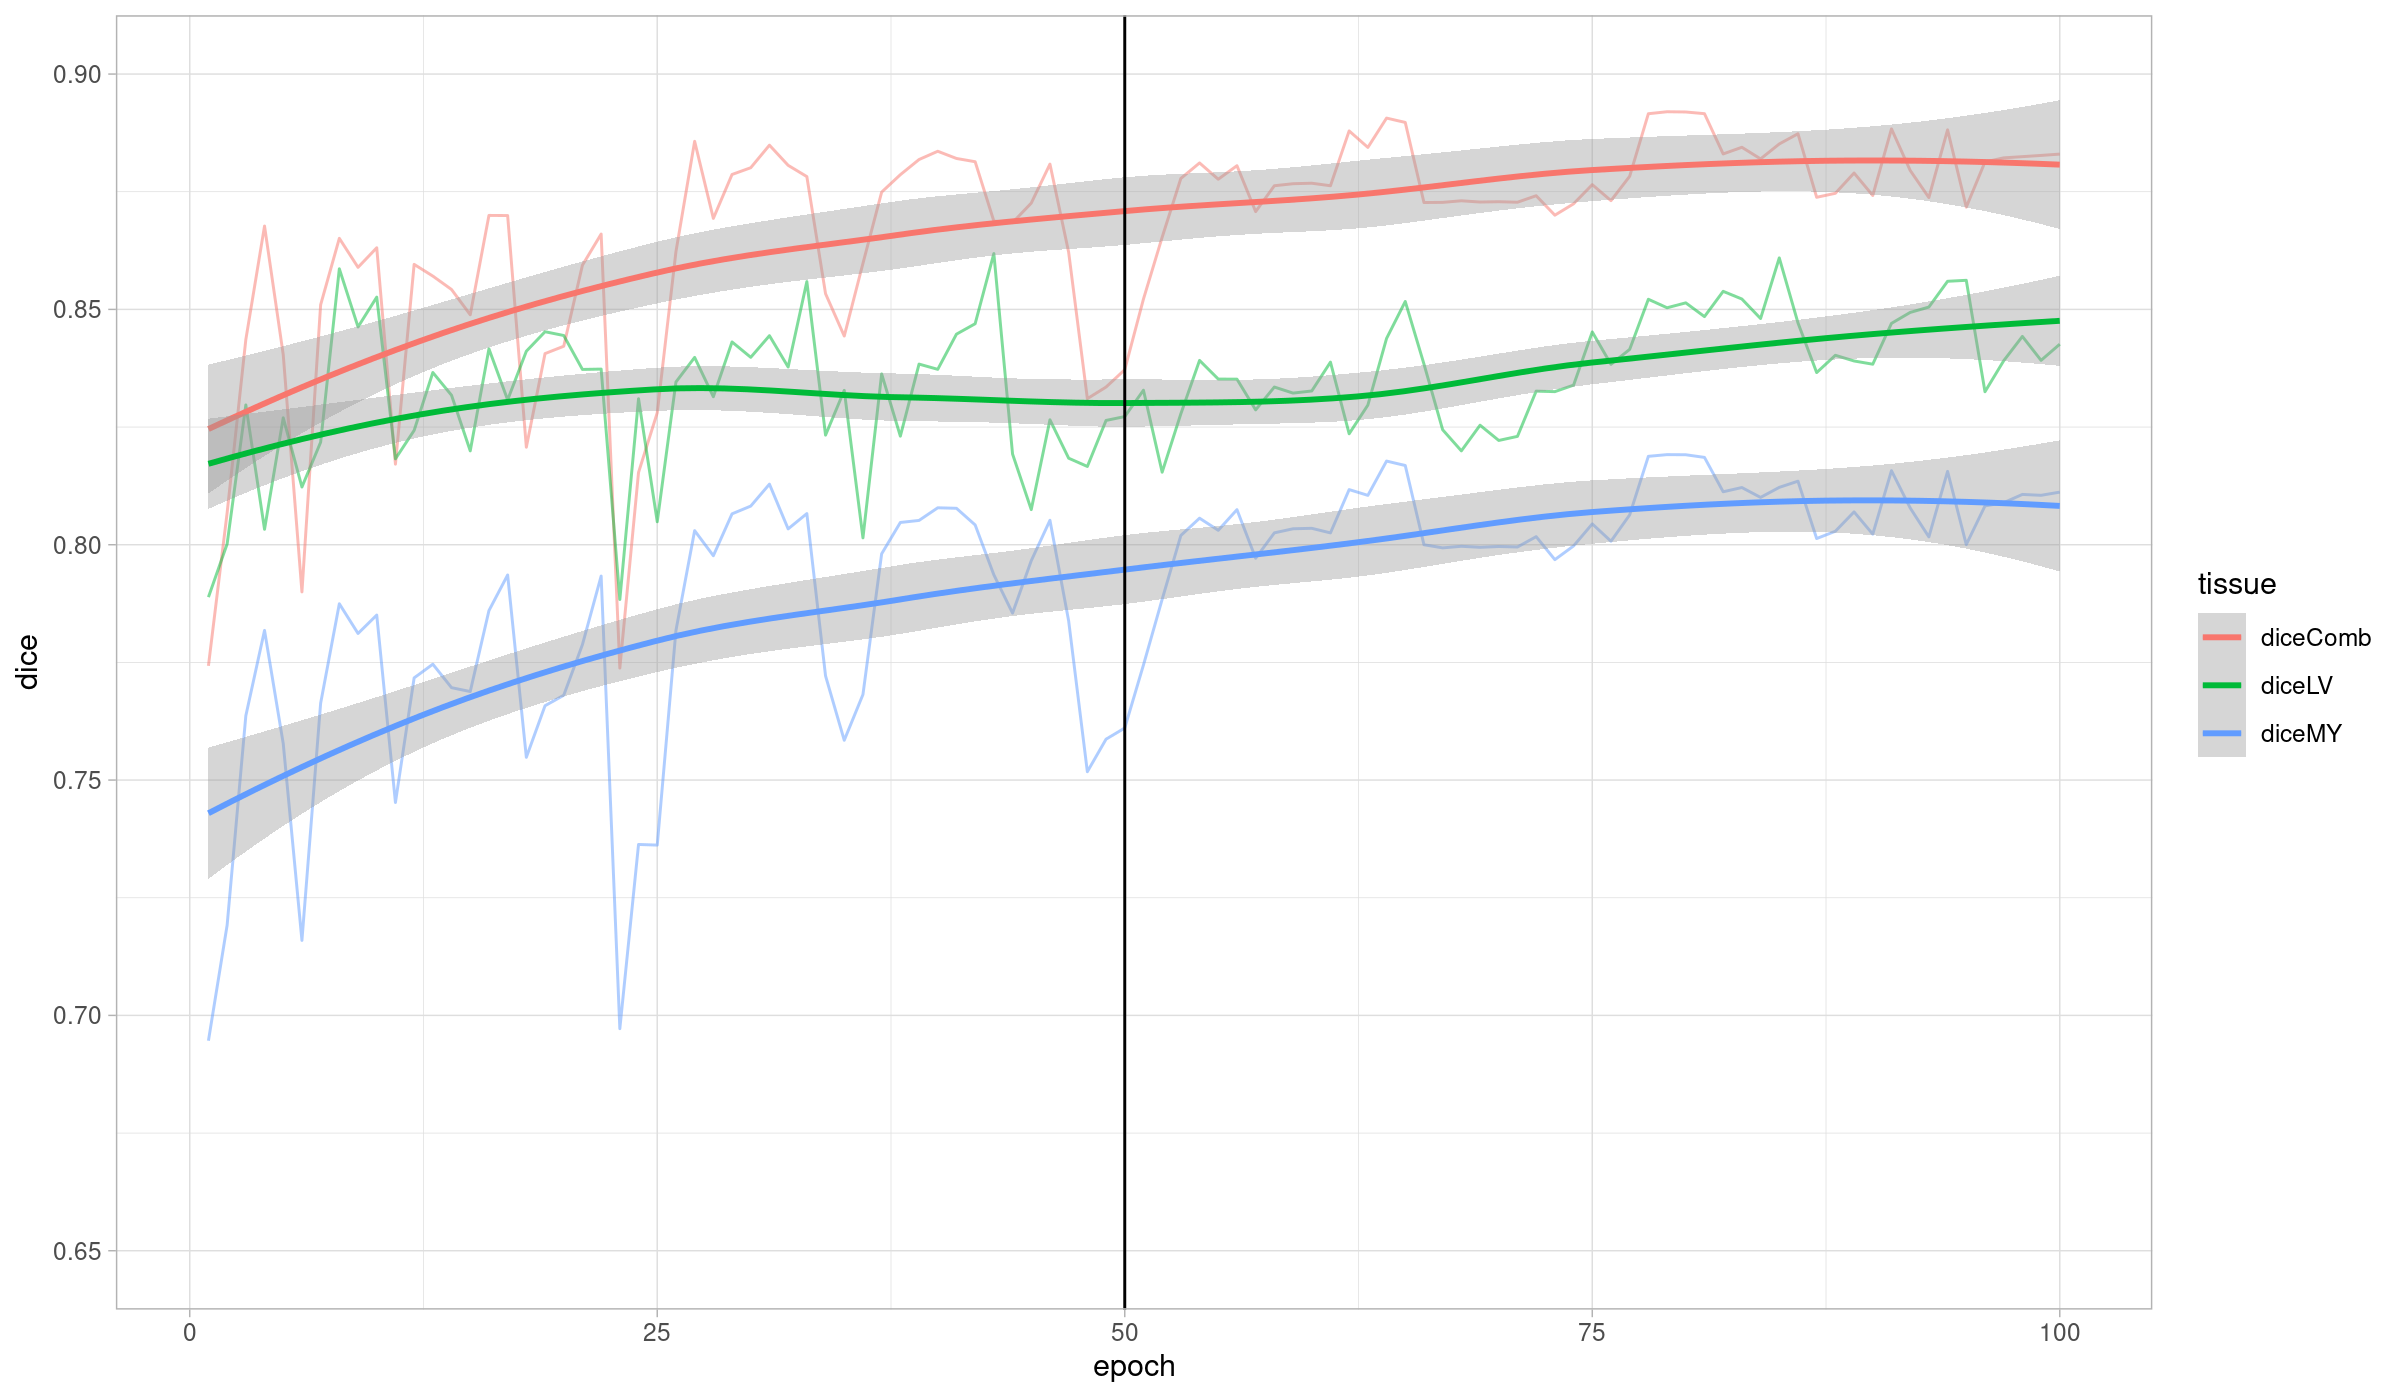

In [22]:
data %>%
    pivot_longer(names_to="tissue",values_to="dice",starts_with("dice")) %>%
    ggplot(aes(epoch, dice, color=tissue)) +
        geom_line(alpha=.5) +
        geom_smooth() +
        ylim(.65,.9) +
        geom_vline(xintercept = 50, col="black")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



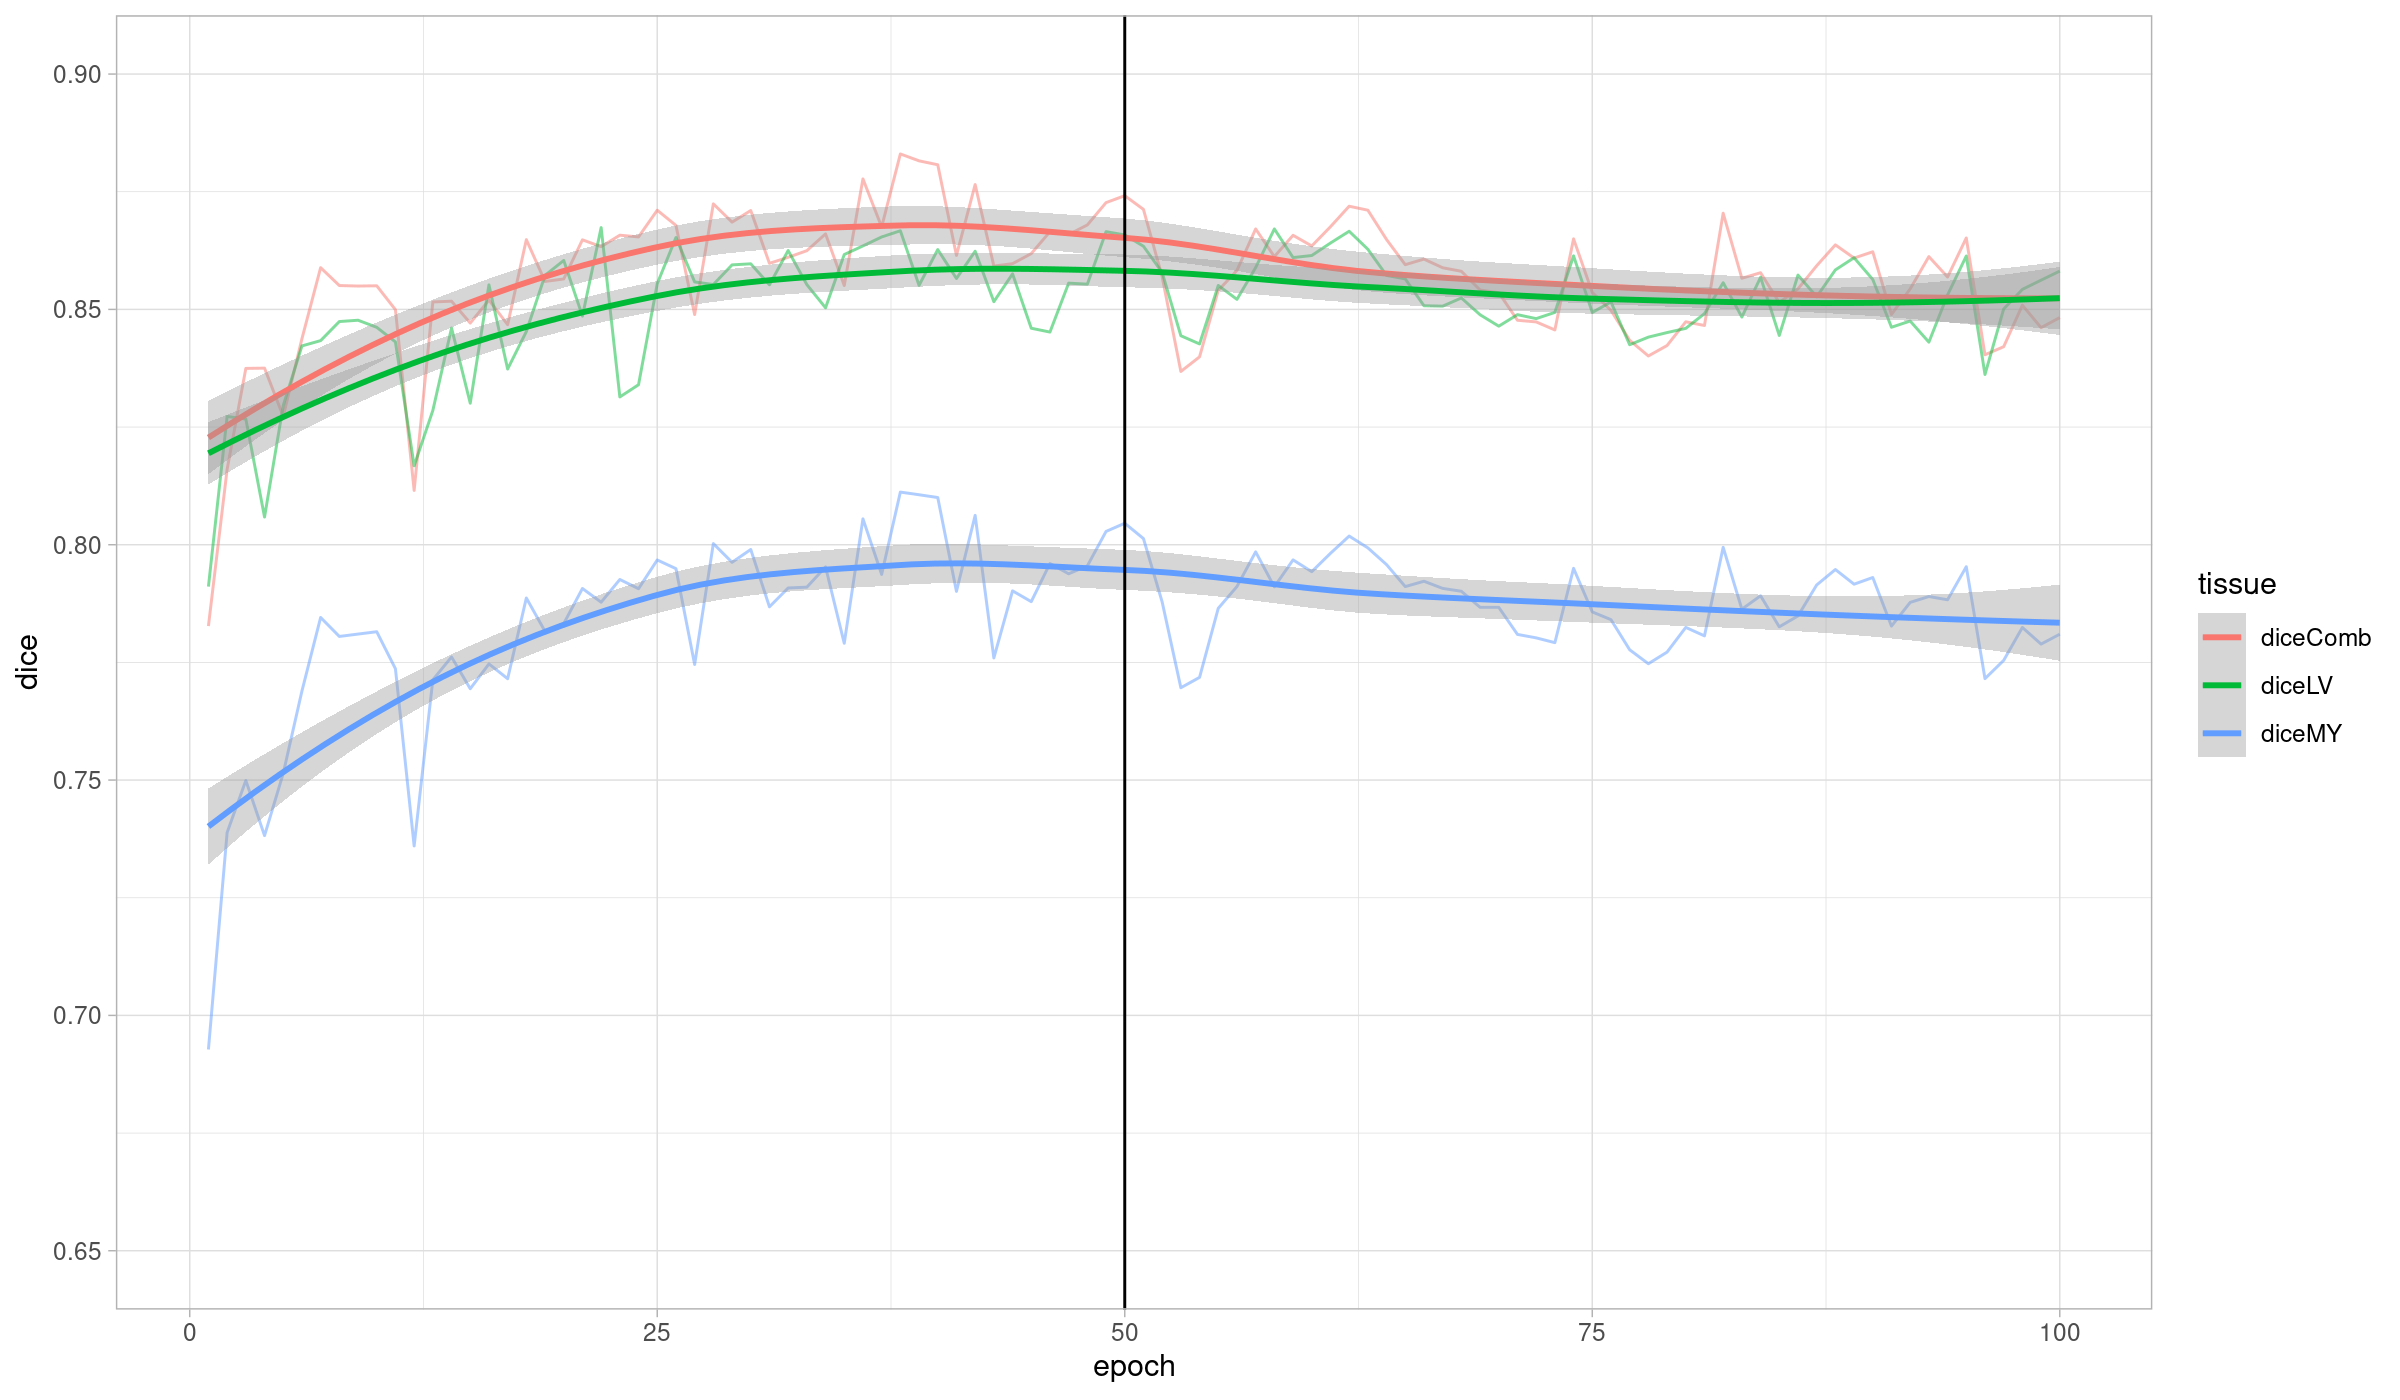

In [20]:
data %>%
    pivot_longer(names_to="tissue",values_to="dice",starts_with("dice")) %>%
    ggplot(aes(epoch, dice, color=tissue)) +
        geom_line(alpha=.5) +
        geom_smooth() +
        ylim(.65,.9) +
        geom_vline(xintercept = 50, col="black")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



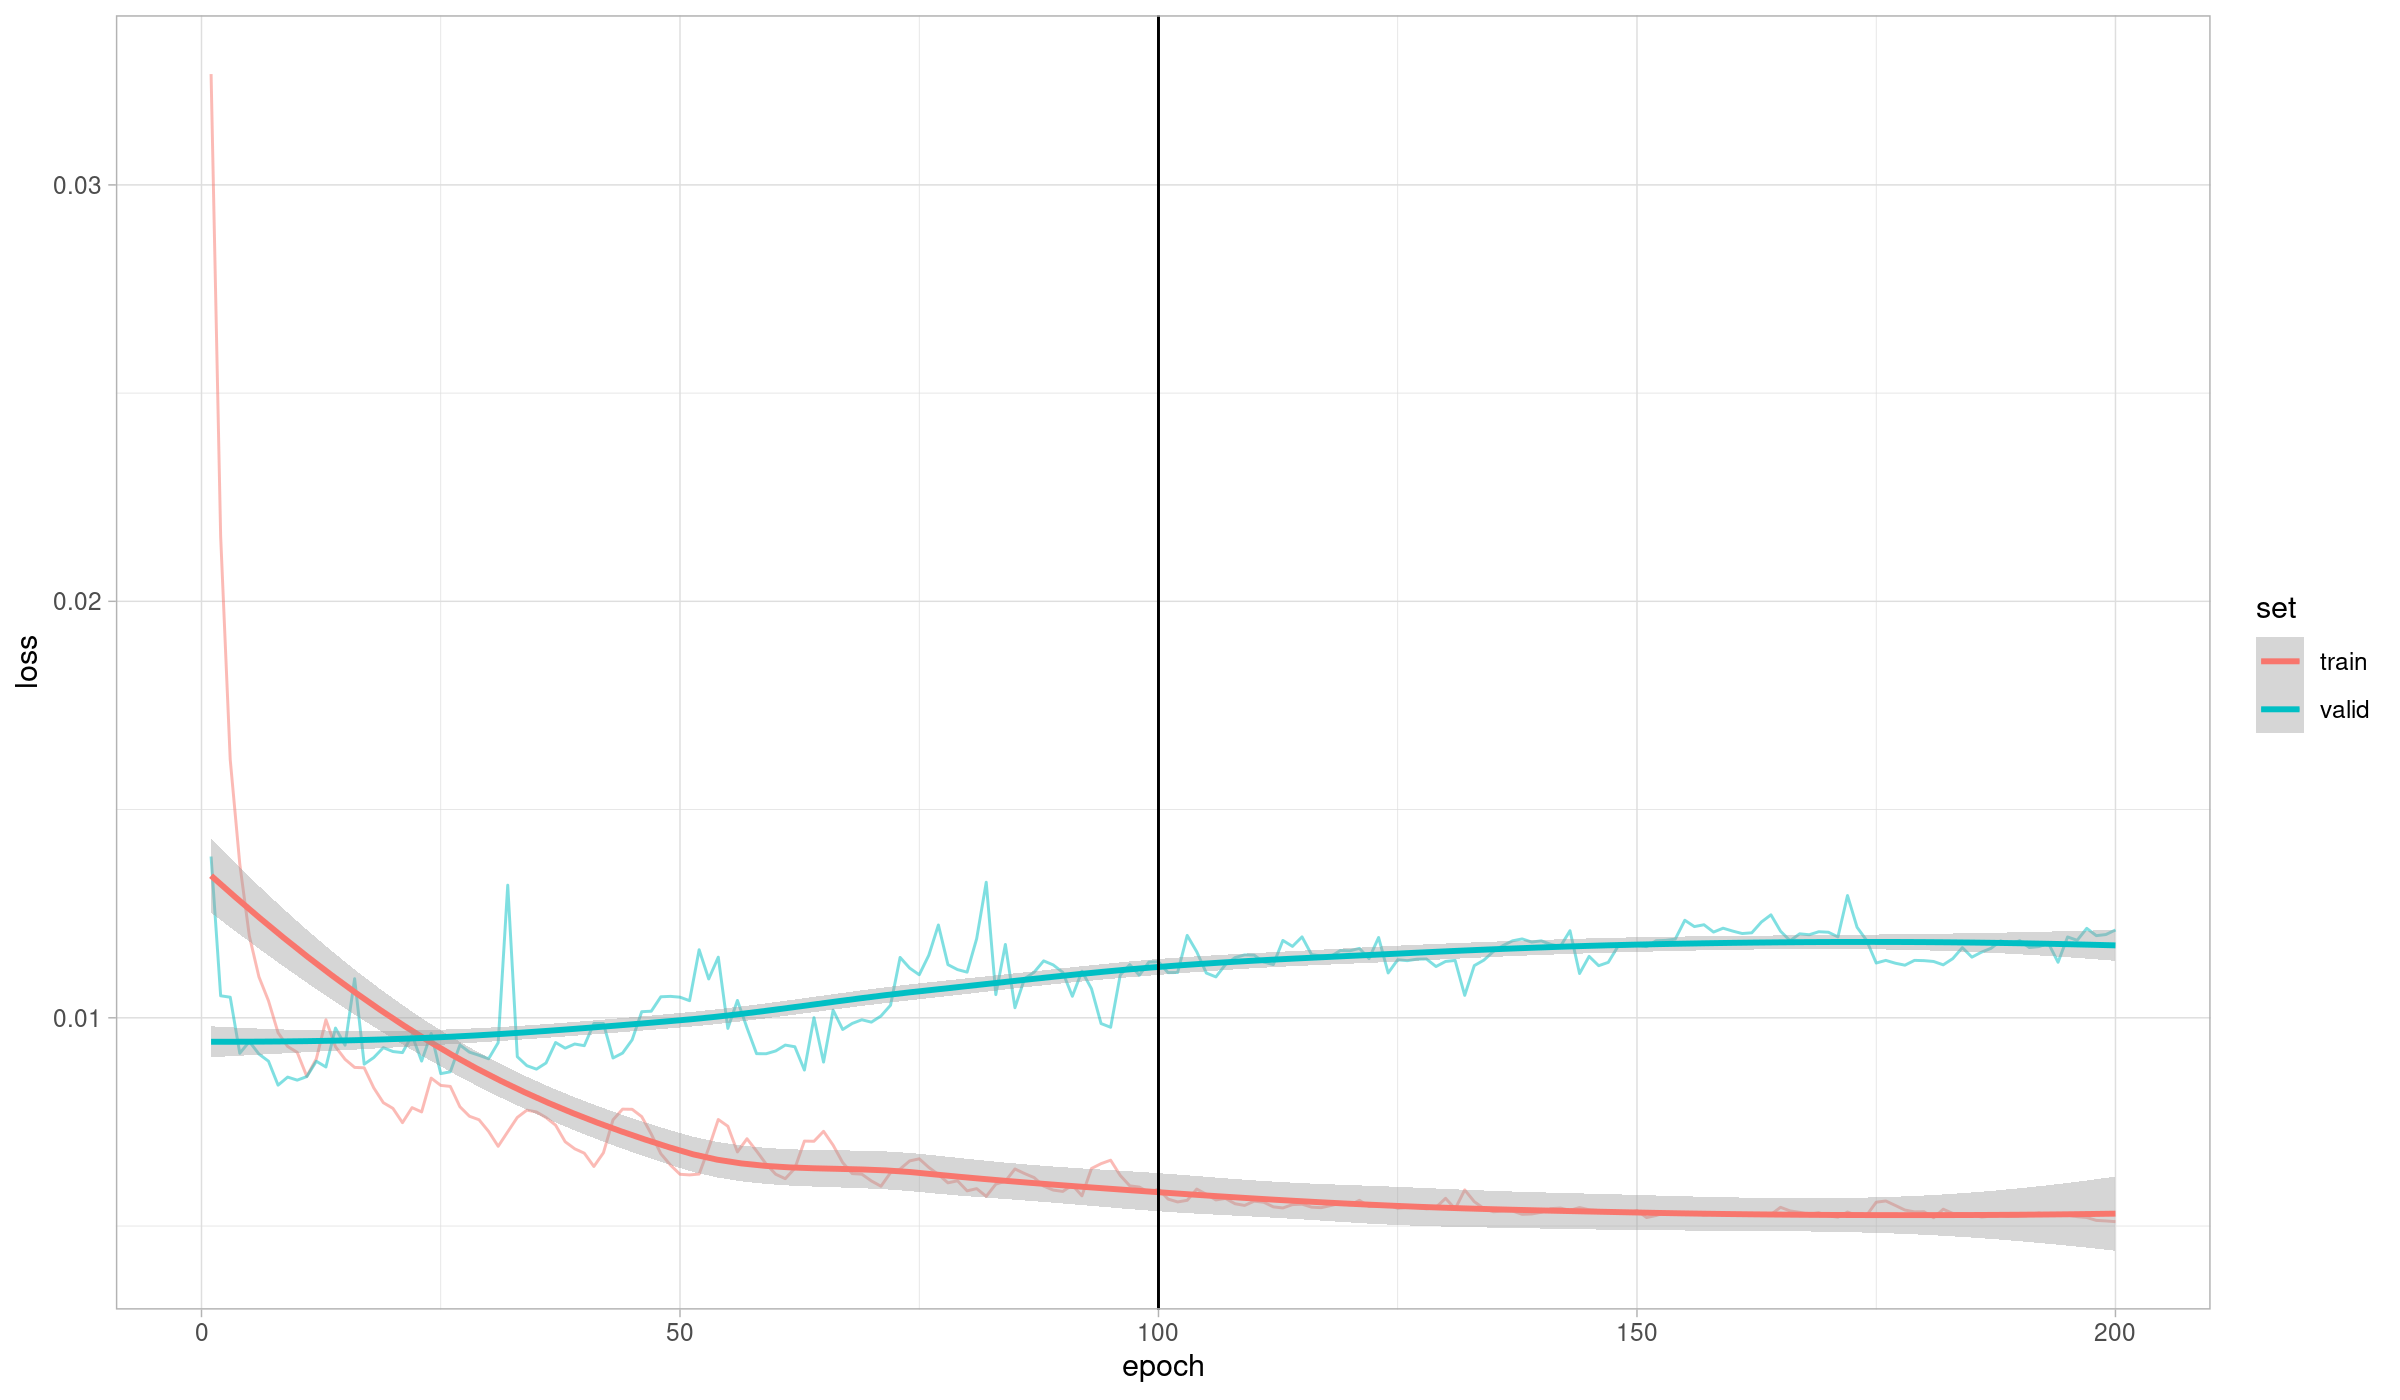

In [8]:
data %>%
    pivot_longer(names_to="set",values_to="loss",contains("loss")) %>%
    mutate(set = str_remove(set, "_loss")) %>%
    ggplot(aes(epoch, loss, color=set)) +
        geom_line(alpha=.5) +
        geom_smooth() +
        geom_vline(xintercept = 100, col="black") +
        #ylim(0,.02) +
        NULL

In [9]:
data %>% filter(epoch%%10==0) %>% arrange(-diceLV)

epoch,train_loss,valid_loss,acc_seg,diceComb,diceLV,diceMY,time
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>
50,0.006241748,0.010495018,0.9965909,0.8790252,0.8591055,0.8074189,00:14:00
70,0.006081857,0.009895264,0.9966428,0.8743265,0.8562530,0.8020242,00:14:00
60,0.006243044,0.009203690,0.9965574,0.8603626,0.8530465,0.7897095,00:14:00
40,0.006748504,0.009329902,0.9965689,0.8730509,0.8517177,0.7997041,00:14:00
30,0.007270688,0.009015978,0.9965034,0.8642220,0.8515071,0.7899385,00:14:00
110,0.005596346,0.011504129,0.9966350,0.8666633,0.8484589,0.7987094,00:14:00
80,0.005844429,0.011096303,0.9965942,0.8646730,0.8482966,0.7930478,00:14:00
20,0.007825050,0.009189770,0.9966035,0.8761080,0.8480268,0.8028471,00:14:00
160,0.005264561,0.012082214,0.9966589,0.8659291,0.8475484,0.7965004,00:14:00


The best performance is achieved after 50 epochs. So this is the model to use for further analyses and evaluation.